In [23]:
import datetime
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import cgmquantify as cgm

# Fix sample 001 HR data
This has already been done. Original data has been added to directory/original, and the new data has been put to directory.

In [17]:
directory = "/Users/matthewlee/Matthew/work/Dunn Lab/big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.0/001/original"
hr_df = pd.read_csv(f"{directory}/HR_001.csv")
lst = []
for i in hr_df['datetime'].values:
    date = dateParser(i)
    date = date - timedelta(days=150)
    lst.append(date.strftime('%Y-%m-%d %H:%M:%S.%f'))
hr_df['datetime'] = np.array(lst)
hr_df.head()

,datetime,hr
0,2020-02-13 15:29:00.000000,94.0
1,2020-02-13 15:29:01.000000,99.0
2,2020-02-13 15:29:02.000000,94.0
3,2020-02-13 15:29:03.000000,82.5
4,2020-02-13 15:29:04.000000,82.6


In [196]:
hr_df.to_csv(f"{directory}/HR_fix_001.csv", index=False)

In [197]:
hr_fix_df = pd.read_csv(f"{directory}/HR_fix_001.csv")
hr_fix_df.head()

,datetime,hr
0,2020-02-13 15:29:00.000000,94.0
1,2020-02-13 15:29:01.000000,99.0
2,2020-02-13 15:29:02.000000,94.0
3,2020-02-13 15:29:03.000000,82.5
4,2020-02-13 15:29:04.000000,82.6


# Data Loading

Load the data into a dataframe.

In [3]:
# set directory as the general save directory for now
directory = "/Users/matthewlee/Matthew/work/Dunn Lab/big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.0"
# set plot style
plt.style.use('ggplot')
# look up the directories
os.listdir(f"{directory}/001")

['TEMP_001.csv',
 'BVP_001.csv',
 'original',
 'ACC_001.csv',
 'HR_fix_001.csv',
 'Food_Log_001.csv',
 'EDA_001.csv',
 'Dexcom_001.csv',
 'IBI_001.csv']

Look at the data format for each of the dataframes.

In [4]:
temp_dir = f"{directory}/001/TEMP_001.csv"
temp_df = pd.read_csv(temp_dir)
temp_df['datetime'] = pd.to_datetime(temp_df['datetime'])
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537040 entries, 0 to 2537039
Data columns (total 2 columns):
 #   Column    Dtype         
---  ------    -----         
 0   datetime  datetime64[ns]
 1    temp     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 38.7 MB


In [5]:
bvp_dir = f"{directory}/001/BVP_001.csv"
bvp_df = pd.read_csv(bvp_dir)
bvp_df['datetime'] = pd.to_datetime(bvp_df['datetime'])
bvp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40592838 entries, 0 to 40592837
Data columns (total 2 columns):
 #   Column    Dtype         
---  ------    -----         
 0   datetime  datetime64[ns]
 1    bvp      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 619.4 MB


In [6]:
acc_dir = f"{directory}/001/ACC_001.csv"
acc_df = pd.read_csv(acc_dir)
acc_df['datetime'] = pd.to_datetime(acc_df['datetime'])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20296428 entries, 0 to 20296427
Data columns (total 4 columns):
 #   Column    Dtype         
---  ------    -----         
 0   datetime  datetime64[ns]
 1    acc_x    float64       
 2    acc_y    float64       
 3    acc_z    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 619.4 MB


In [7]:
hr_dir = f"{directory}/001/HR_fix_001.csv"
hr_df = pd.read_csv(hr_dir)
hr_df['datetime'] = pd.to_datetime(hr_df['datetime'])
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634188 entries, 0 to 634187
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  634188 non-null  datetime64[ns]
 1    hr       634188 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.7 MB


In [8]:
food_dir = f"{directory}/001/Food_Log_001.csv"
food_df = pd.read_csv(food_dir)
food_df['datetime'] = pd.to_datetime(food_df['time_begin'])
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           61 non-null     object        
 1   time           61 non-null     object        
 2   time_begin     61 non-null     object        
 3   time_end       0 non-null      float64       
 4   logged_food    61 non-null     object        
 5   amount         60 non-null     float64       
 6   unit           40 non-null     object        
 7   searched_food  60 non-null     object        
 8   calorie        61 non-null     float64       
 9   total_carb     61 non-null     float64       
 10  dietary_fiber  4 non-null      float64       
 11  sugar          61 non-null     float64       
 12  protein        61 non-null     float64       
 13  total_fat      4 non-null      float64       
 14  datetime       61 non-null     datetime64[ns]
dtypes: datetime64[ns](1), flo

In [9]:
eda_dir = f"{directory}/001/EDA_001.csv"
eda_df = pd.read_csv(eda_dir)
eda_df['datetime'] = pd.to_datetime(eda_df['datetime'])
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537046 entries, 0 to 2537045
Data columns (total 2 columns):
 #   Column    Dtype         
---  ------    -----         
 0   datetime  datetime64[ns]
 1    eda      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 38.7 MB


In [18]:
def importdexcom(filename):
    """
        Imports data from Dexcom continuous glucose monitor devices
        Args:
            filename (String): path to file
        Returns:
            (pd.DataFrame): dataframe of data with DateTime, Time and Glucose columns
    """
    data = pd.read_csv(filename) 
    df = pd.DataFrame()
    df['Time'] = data['Timestamp (YYYY-MM-DDThh:mm:ss)']
    df['Glucose'] = pd.to_numeric(data['Glucose Value (mg/dL)'])
    df.drop(df.index[:12], inplace=True)
    df['Time'] =  pd.to_datetime(df['Time'], format='%Y-%m-%dT%H:%M:%S')
    df['Day'] = df['Time'].dt.date
    df = df.reset_index()
    return df

In [10]:
dexcom_dir = f"{directory}/001/Dexcom_001.csv"
dexcom_df = pd.read_csv(dexcom_dir)
dexcom_df['datetime'] = pd.to_datetime(dexcom_df['Timestamp (YYYY-MM-DDThh:mm:ss)'])
dexcom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Index                               2573 non-null   int64         
 1   Timestamp (YYYY-MM-DDThh:mm:ss)     2561 non-null   object        
 2   Event Type                          2573 non-null   object        
 3   Event Subtype                       7 non-null      object        
 4   Patient Info                        4 non-null      object        
 5   Device Info                         1 non-null      object        
 6   Source Device ID                    2569 non-null   object        
 7   Glucose Value (mg/dL)               2565 non-null   float64       
 8   Insulin Value (u)                   0 non-null      float64       
 9   Carb Value (grams)                  0 non-null      float64       
 10  Duration (hh:mm:ss)     

In [20]:
directory = "/Users/matthewlee/Matthew/work/Dunn Lab/big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.0/"
dexcom_dir = f"{directory}/001/Dexcom_001.csv"
dexcom_df = importdexcom(dexcom_dir)
dexcom_df.head()

,index,Time,Glucose,Day
0,12,2020-02-13 17:23:32,61.0,2020-02-13
1,13,2020-02-13 17:28:32,59.0,2020-02-13
2,14,2020-02-13 17:33:32,58.0,2020-02-13
3,15,2020-02-13 17:38:32,59.0,2020-02-13
4,16,2020-02-13 17:43:31,63.0,2020-02-13


In [11]:
ibi_dir = f"{directory}/001/IBI_001.csv"
ibi_df = pd.read_csv(ibi_dir)
ibi_df['datetime'] = pd.to_datetime(ibi_df['datetime'])
ibi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266366 entries, 0 to 266365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  266366 non-null  datetime64[ns]
 1    ibi      266366 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 MB


In [16]:
df_final = mergedDF(f"{directory}/001", 'datetime')

TEMP_001.csv
2537040
BVP_001.csv
2537040
original
ACC_001.csv
2537040
HR_fix_001.csv
634180
Food_Log_001.csv
EDA_001.csv
634180
Dexcom_001.csv
2055
IBI_001.csv
848


In [306]:
df_final.head()

,datetime,temp,bvp,acc_x,acc_y,acc_z,hr,eda,Index,Timestamp (YYYY-MM-DDThh:mm:ss),...,Patient Info,Device Info,Source Device ID,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),Glucose Rate of Change (mg/dL/min),Transmitter Time (Long Integer),ibi
0,2020-02-13 17:23:32,33.63,0.73,-3.0,48.0,44.0,74.87,0.184489,13,2020-02-13 17:23:32,...,NaN,NaN,iPhone G6,61.0,NaN,NaN,NaN,NaN,11101.0,0.765660
1,2020-02-13 17:28:32,32.95,-2.46,-7.0,45.0,34.0,85.30,1.213610,14,2020-02-13 17:28:32,...,NaN,NaN,iPhone G6,59.0,NaN,NaN,NaN,NaN,11401.0,0.640654
2,2020-02-13 17:43:31,33.39,-1.37,34.0,44.0,-28.0,81.55,2.096640,17,2020-02-13 17:43:31,...,NaN,NaN,iPhone G6,63.0,NaN,NaN,NaN,NaN,12301.0,0.609403
3,2020-02-13 17:53:31,34.27,-2.03,37.0,40.0,-30.0,82.87,3.622644,19,2020-02-13 17:53:31,...,NaN,NaN,iPhone G6,68.0,NaN,NaN,NaN,NaN,12901.0,0.843789
4,2020-02-13 18:13:32,34.89,-9.95,35.0,44.0,30.0,73.18,0.408962,23,2020-02-13 18:13:32,...,NaN,NaN,iPhone G6,70.0,NaN,NaN,NaN,NaN,14101.0,0.781286


In [14]:
# function: parses date string into DateTime Object
# input: date
# output: DateTime Object
def dateParser(date):
    mainFormat = '%Y-%m-%d %H:%M:%S.%f'
    altFormat = '%Y-%m-%d %H:%M:%S'
    try:
        return datetime.datetime.strptime(date, mainFormat)
    except ValueError:
        return datetime.datetime.strptime(date, altFormat)

In [14]:
# function: plots the data given two column names and a file
# input: col1, col2, filename
# output: None (displays plot)
def dataPlot(col1, col2, filename):
    df = pd.read_csv(f"{directory}/{filename}")
    plt.plot(df[col1][:20], df[col2][:20])

In [15]:
# function: create merged pandas dataframe on a specified axis
# input: directory, axis
# output: merged pandas dataframe according to specified axis
def mergedDF(directory, axis):
    df_final = pd.DataFrame()
    for file in os.listdir(directory):
        df = pd.DataFrame()
        # if the file extension is .csv
        if 'Food_Log' in file:
            continue
        if file.endswith('.csv'):
            # read the csv file into a pandas dataframe
            df = pd.read_csv(f'{directory}/{file}')
            # make datetime a datetime object otherwise check for exceptions to create new column
            if 'Food_Log' in file:
                df['datetime'] = pd.to_datetime(df['time_begin'])
            elif 'Dexcom' in file:
                df['datetime'] = pd.to_datetime(df['Timestamp (YYYY-MM-DDThh:mm:ss)'])
            elif 'IBI' in file:
                df['datetime'] = pd.to_datetime(np.array([i.replace(microsecond=0) for i in ibi_df['datetime']]))
            else:
                df['datetime'] = pd.to_datetime(df['datetime'])
        else:
            continue
        if len(df_final.columns) == 0:
            df_final = df
        else:
            df_final = df_final.merge(df, on='datetime', how='inner')
    return df_final

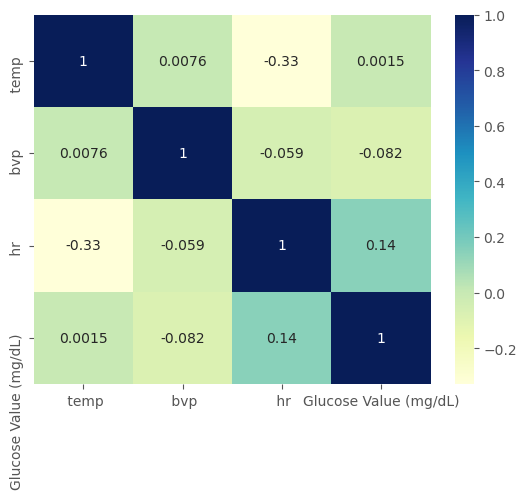

In [17]:
matrix = df_final.corr()
df = df_final[[' temp', ' bvp', ' hr', 'Glucose Value (mg/dL)']]
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Augmented Dickey-Fuller Test
Testing if time series data is stationary.

In [19]:
result = adfuller(hr_df[' hr'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -25.852859
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [ ]:
result = adfuller(eda_df[' eda'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [1]:
print(len(eda_df))

NameError: name 'eda_df' is not defined

In [ ]:
result = adfuller(temp_df[' temp'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))